In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
from statsmodels.stats.power import tt_ind_solve_power
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dat = pd.read_csv('datasets_logos.csv')
dat.head()

,id,friendly,inviting,interesting,positive,pleasant,sex,logo
0,3,9,8,9,10,9,f,Logo A
1,98,7,6,8,7,7,f,Logo C
2,73,5,3,6,6,6,m,Logo C
3,89,4,5,2,3,4,f,Logo C
4,13,8,7,9,8,6,f,Logo A


In [3]:
dat['sentiment'] = dat[['friendly', 'inviting', 'interesting','positive','pleasant']].apply(np.mean, axis=1)
dat.head()

,id,friendly,inviting,interesting,positive,pleasant,sex,logo,sentiment
0,3,9,8,9,10,9,f,Logo A,9.0
1,98,7,6,8,7,7,f,Logo C,7.0
2,73,5,3,6,6,6,m,Logo C,5.2
3,89,4,5,2,3,4,f,Logo C,3.6
4,13,8,7,9,8,6,f,Logo A,7.6


In [4]:
print('Mean of Sentiment = ' + str(np.mean(dat.sentiment).round(3)))
print('STD of Sentiment = ' + str(np.std(dat.sentiment).round(3)))

Mean of Sentiment = 7.972
STD of Sentiment = 1.536


Text(0.5, 1.0, 'Sentiment')

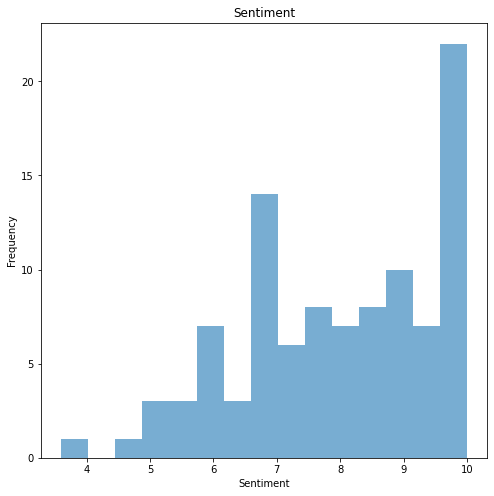

In [5]:
ax = plt.figure(figsize=(8,8)).gca()
dat.sentiment.plot.hist(ax=ax, alpha= 0.6, bins= 15)
plt.xlabel('Sentiment')
plt.title("Sentiment")

In [6]:
#looking for missing values

In [7]:
for col in dat.columns:
    print(col+' has missing values '+ 
         str((dat[col].isnull().values.any())) or 
          str(dat[col].isna().values.any()))

id has missing values False
friendly has missing values False
inviting has missing values False
interesting has missing values False
positive has missing values False
pleasant has missing values False
sex has missing values False
logo has missing values True
sentiment has missing values False


In [8]:
#see how many and then remove them
print(dat.shape)
dat.dropna(subset= ['logo'], inplace=True)
print(dat.shape)

(100, 9)
(99, 9)


In [9]:
#Check once more
for col in dat.columns:
    print(col+' has missing values '+ 
         str((dat[col].isnull().values.any())) or 
          str(dat[col].isna().values.any()))

id has missing values False
friendly has missing values False
inviting has missing values False
interesting has missing values False
positive has missing values False
pleasant has missing values False
sex has missing values False
logo has missing values False
sentiment has missing values False


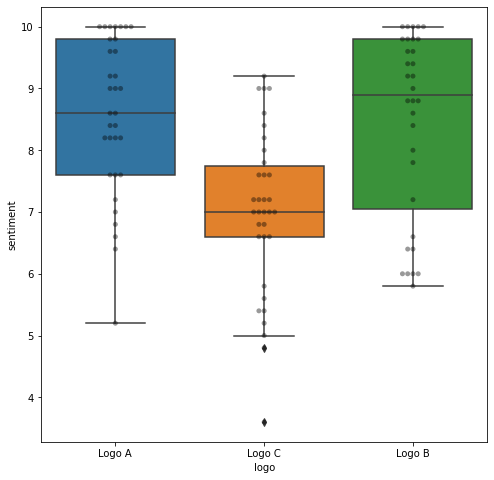

In [10]:
ax = plt.figure(figsize=(8,8)).gca()
sns.boxplot(x='logo', y='sentiment', data = dat, ax =ax)
sns.swarmplot(x='logo', y='sentiment', color='black', alpha=0.4,data = dat, ax =ax)

In [11]:
logo_grouped =dat[['logo', 'sentiment']].groupby('logo')

print('MEan by logo')
print(logo_grouped.mean().round(2))
print('\n Standard deviation by logo')
print(logo_grouped.std().round(2))

MEan by logo
        sentiment
logo             
Logo A       8.58
Logo B       8.44
Logo C       7.00

 Standard deviation by logo
        sentiment
logo             
Logo A       1.27
Logo B       1.51
Logo C       1.33


In [13]:
def t_test_two_sample(a,b, alpha, alternative='two-sided'):
    
    diff = a.mean() - b.mean()
    
    res = ss.ttest_ind(a,b)
    
    means = ws.CompareMeans(ws.DescrStatsW(a),ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal')
    degfree = means.dof_satt()
    
    index = ['DegFreedom', 'Difference', 'Statistic', 'P-Value','Low95CI', 'High85CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index=index)

test = t_test_two_sample(dat.loc[dat.logo == 'Logo A','sentiment'],
                        dat.loc[dat.logo == 'Logo B','sentiment'], 0.05)
test


DegFreedom    60.546791
Difference     0.132008
Statistic      0.381916
P-Value        0.703809
Low95CI       -0.561103
High85CI       0.825118
dtype: float64

In [14]:
logo_grouped.count()

,sentiment
logo,
Logo A,33
Logo B,32
Logo C,34


In [15]:
d = (8.58 - 8.44)/(np.std(dat.loc[dat.logo == 'Logo A', 'sentiment']))
d

0.11189360267699686

In [16]:
tt_ind_solve_power(effect_size=d, nobs1=32,alpha=0.05, power= None, ratio=1, alternative='two-sided')

0.07252871716498967

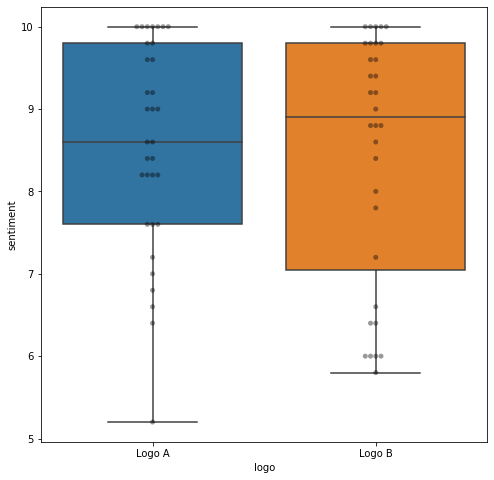

In [17]:
ax = plt.figure(figsize=(8,8)).gca() # define axis
temp = dat[dat.logo != 'Logo C']
sns.boxplot(x = 'logo', y = 'sentiment', data = temp, ax = ax)
sns.swarmplot(x = 'logo', y = 'sentiment', color = 'black', data = temp, ax = ax, alpha = 0.4)

In [18]:
tt_ind_solve_power(effect_size=None, nobs1=32,alpha=0.05, power= .8, ratio=1, alternative='two-sided')

0.711479964061509

In [19]:
tt_ind_solve_power(effect_size=.2, nobs1=None,alpha=0.05, power= .8, ratio=1, alternative='two-sided')

393.4056989990335

In [20]:
f_statistic, p_value = ss.f_oneway(dat.loc[dat.logo == 'Logo A', 'sentiment'],
                                   dat.loc[dat.logo == 'Logo B', 'sentiment'],
                                   dat.loc[dat.logo == 'Logo C', 'sentiment'])
print('F-Satatistic = ' + str(f_statistic))
print('p_value = ' + str(p_value))

F-Satatistic = 13.611076880502567
p_value = 6.251108050657806e-06


In [21]:
Tukey_HSD = pairwise_tukeyhsd(dat.sentiment, dat.logo)
print(Tukey_HSD)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
Logo A Logo B   -0.132   0.9 -0.9423  0.6783  False
Logo A Logo C  -1.5758 0.001 -2.3739 -0.7776   True
Logo B Logo C  -1.4438 0.001 -2.2482 -0.6393   True
---------------------------------------------------


In [22]:
logo_grouped = dat[['logo','sentiment']].groupby('logo')

print(' Mean by logo')
print(logo_grouped.mean().round(2))
print('\n Standard deviation by logo')
print(logo_grouped.std().round(2))

 Mean by logo
        sentiment
logo             
Logo A       8.58
Logo B       8.44
Logo C       7.00

 Standard deviation by logo
        sentiment
logo             
Logo A       1.27
Logo B       1.51
Logo C       1.33


# Suggested final report